In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [25]:
# Define the path to the CSV file (local or URL)
csv_path = '/Users/mac/Downloads/studentSalary.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
print(df.head())

        job_nature industry student_group  median_salary  count
0  closely_related        A             x           3150     83
1  closely_related        B             x           3300     53
2  closely_related        C             x           2650     47
3  closely_related        D             x           2400     12
4     some_related        E             x           4100     30


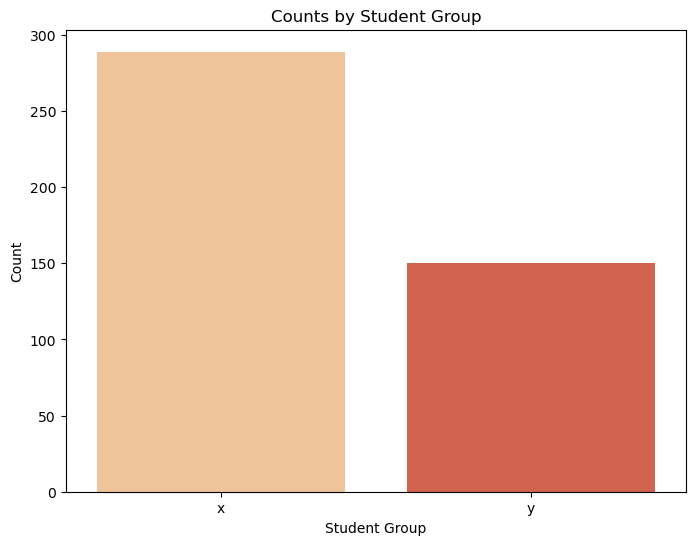

Data Characteristic 1: There are more students from group x than group y in this course of study


In [26]:

########Data Characteristics 1########
# Summing counts for each student group
group_counts = df.groupby('student_group')['count'].sum().reset_index()

# Seaborn plot
plt.figure(figsize=(8, 6))
sns.barplot(x='student_group', y='count', data=group_counts, hue='student_group', palette="OrRd", dodge=False)
plt.title('Counts by Student Group')
plt.xlabel('Student Group')
plt.ylabel('Count')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

# Extract counts for each student group
group_x = df[df['student_group'] == 'x']['count']
group_y = df[df['student_group'] == 'y']['count']

# # Perform an independent t-test
# t_stat, p_value = ttest_ind(group_x, group_y, equal_var=False)

# # Display the t-test results
# print("t-statistic:", t_stat)
print("Data Characteristic 1: There are more students from group x than group y in this course of study")

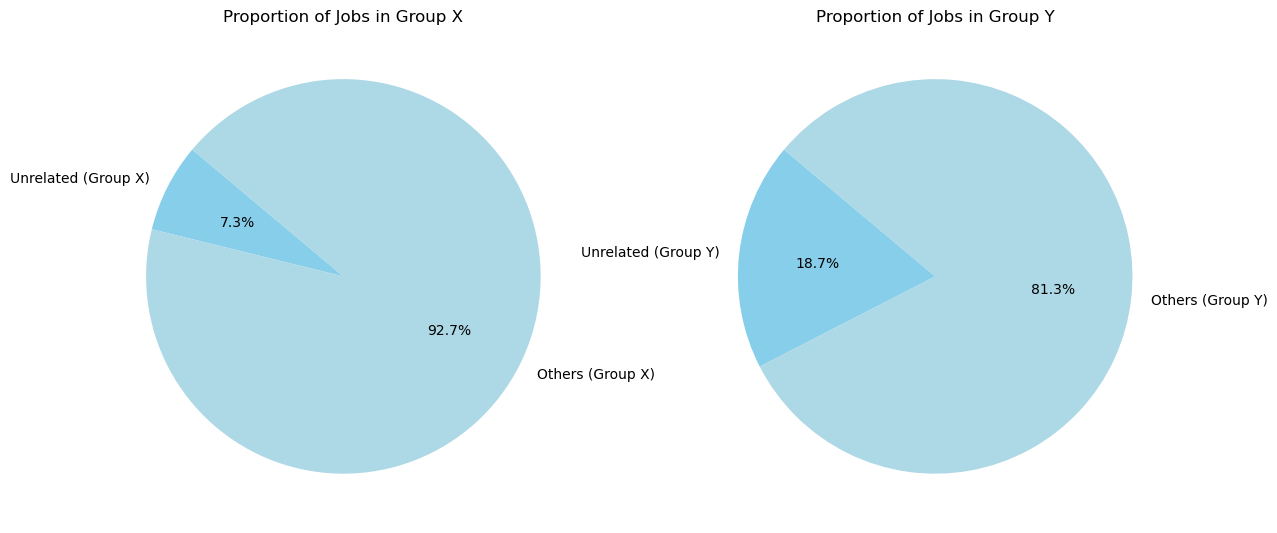

Proportion of 'unrelated' jobs in Group X: 7.27%
Proportion of 'unrelated' jobs in Group Y: 18.67%
Data Characteristic 2: proportionally more students from group y are in unrelated jobs to the course of study


In [27]:
# Filter the DataFrame based on student groups
df_x = df[df['student_group'] == 'x']
df_y = df[df['student_group'] == 'y']

# Calculate the total number of students in each group
total_x = df_x['count'].sum()
total_y = df_y['count'].sum()

# Calculate the number of students with 'unrelated' job nature in each group
unrelated_count_x = df_x[df_x['job_nature'] == 'unrelated']['count'].sum()
unrelated_count_y = df_y[df_y['job_nature'] == 'unrelated']['count'].sum()


# Compute the proportion of 'unrelated' jobs in each group
# Handle potential division by zero
prop_x = (unrelated_count_x / total_x) if total_x != 0 else 0
prop_y = (unrelated_count_y / total_y) if total_y != 0 else 0


#calculate proportion of not unrelated jobs in each group
others_x= 1-prop_x
others_y= 1-prop_y

# Data for the pie chart
colors = ['skyblue', 'lightblue', 'lightgreen', 'palegreen']
labels_x = ['Unrelated (Group X)', 'Others (Group X)']
labels_y = ['Unrelated (Group Y)', 'Others (Group Y)']

sizes_x = [prop_x, others_x]
sizes_y = [prop_y, others_y]
# Plotting the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(sizes_x, labels=labels_x, colors=colors, autopct='%.1f%%', startangle=140)
axs[0].set_title('Proportion of Jobs in Group X')

axs[1].pie(sizes_y, labels=labels_y, colors=colors, autopct='%.1f%%', startangle=140)
axs[1].set_title('Proportion of Jobs in Group Y')

plt.show()

# Display the results
print(f"Proportion of 'unrelated' jobs in Group X: {prop_x:.2%}")
print(f"Proportion of 'unrelated' jobs in Group Y: {prop_y:.2%}")

print ("Data Characteristic 2: proportionally more students from group y are in unrelated jobs to the course of study")

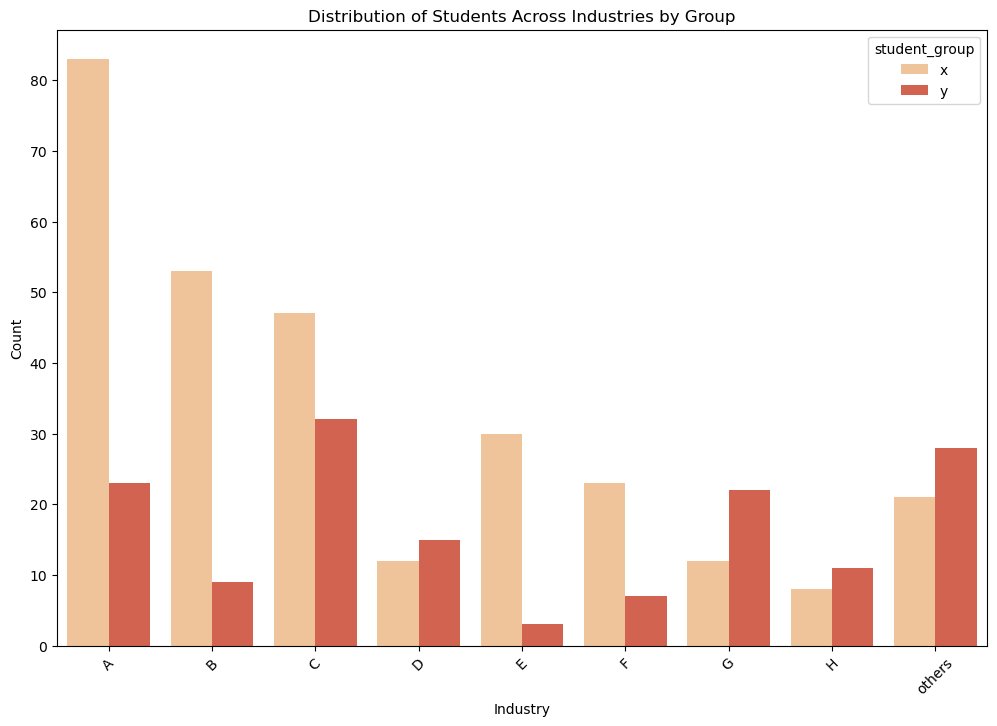

Chi-square statistic: 66.01552134686692
p-value: 3.0383769410625284e-11
Data Characteristic 3: There is significant difference in the distribution of each student group across the inudstries


In [28]:


########Data Characteristics 3########

# Create a new table with industry, student group, and count columns
industry_group_counts = df.groupby(['industry', 'student_group'])['count'].sum().reset_index()

# Draw a clustered bar plot to visualize the distribution of students across industries by group
plt.figure(figsize=(12, 8))
sns.barplot(x='industry', y='count', hue='student_group', data=industry_group_counts, palette="OrRd")
plt.title('Distribution of Students Across Industries by Group')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# Create a new table with industry, student group, and count columns
industry_group_counts = df.groupby(['industry', 'student_group'])['count'].sum().reset_index()

# Pivot the table to create a contingency table for the chi-square test
contingency_table = industry_group_counts.pivot(index='industry', columns='student_group', values='count').fillna(0)

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Output the results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print ("Data Characteristic 3: There is significant difference in the distribution of each student group across the inudstries")

        job_nature industry student_group  median_salary  count weights  \
0  closely_related        A             x           3150     83       0   
1  closely_related        B             x           3300     53       0   
2  closely_related        C             x           2650     47       0   
3  closely_related        D             x           2400     12       0   
4     some_related        E             x           4100     30       0   

                                     weighted_salary  
0  0000000000000000000000000000000000000000000000...  
1  0000000000000000000000000000000000000000000000...  
2  0000000000000000000000000000000000000000000000...  
3  0000000000000000000000000000000000000000000000...  
4  0000000000000000000000000000000000000000000000...  


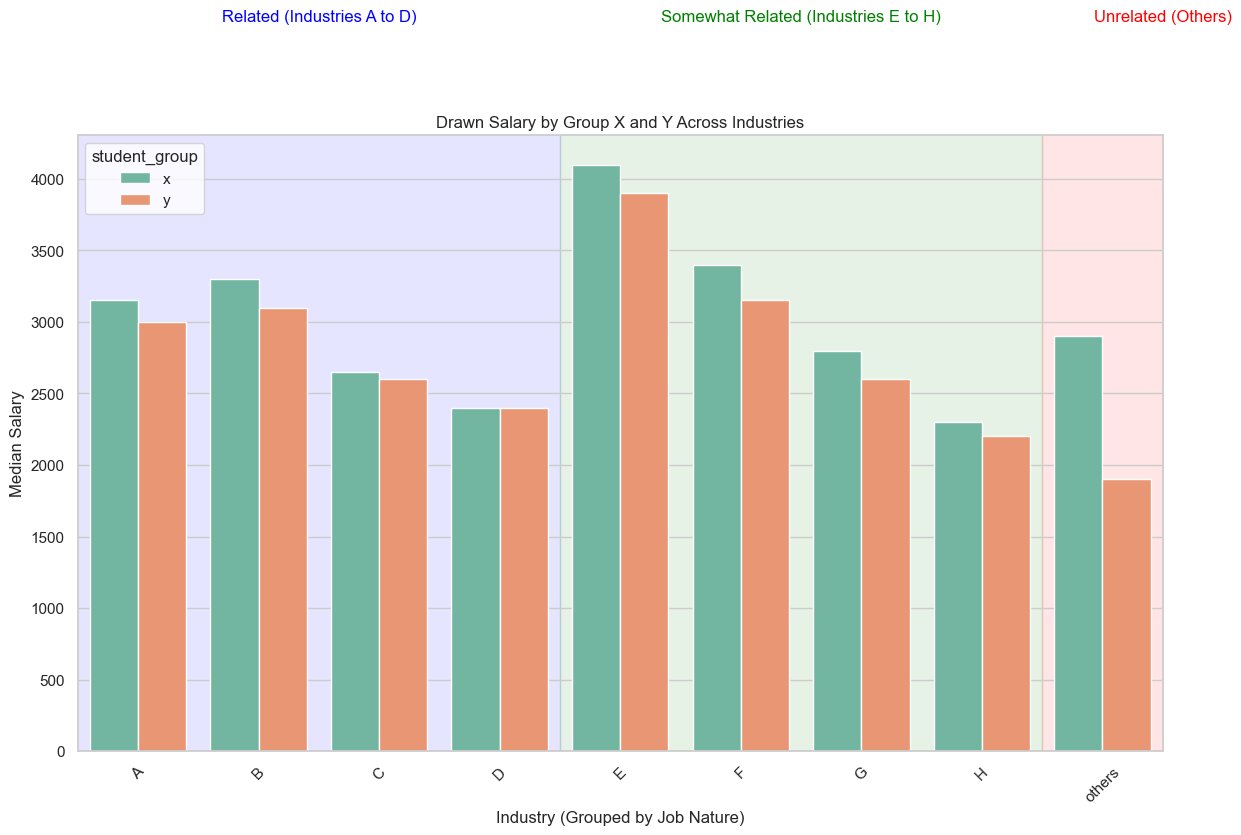

Chi-square statistic: 13.1250
p-value: 0.6636
Degrees of freedom: 16
Expected frequencies:
 [[0.44444444 0.88888889 1.33333333 0.88888889 0.44444444 0.88888889
  1.33333333 1.33333333 0.44444444]
 [0.44444444 0.88888889 1.33333333 0.88888889 0.44444444 0.88888889
  1.33333333 1.33333333 0.44444444]
 [0.11111111 0.22222222 0.33333333 0.22222222 0.11111111 0.22222222
  0.33333333 0.33333333 0.11111111]]
Data characteristic 4: The group x students do not necessarily command higher salaries


In [73]:

########Data Characteristics 4########

# Create a bar chart that shows the median salary by student group across industries,
# with job nature indicated by grouping the industries on the x-axis

plt.figure(figsize=(14, 8))

# We will use hue for student groups and draw multiple bars for each industry
sns.barplot(x='industry', y='median_salary', hue='student_group', data=df, palette="Set2")

# Add titles and labels
plt.title('Drawn Salary by Group X and Y Across Industries')
plt.xlabel('Industry (Grouped by Job Nature)')
plt.ylabel('Median Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Draw overlay boxes for industry groups
plt.gca().add_patch(plt.Rectangle((-1, df['median_salary'].min() - 2000), 4.5, df['median_salary'].max() + 1000, 
                                  color='blue', alpha=0.1, zorder=0))
plt.gca().add_patch(plt.Rectangle((3.5, df['median_salary'].min() - 2000), 4, df['median_salary'].max() + 1000, 
                                  color='green', alpha=0.1, zorder=0))
plt.gca().add_patch(plt.Rectangle((7.5, df['median_salary'].min() - 2000), 1, df['median_salary'].max() + 1000, 
                                  color='red', alpha=0.1, zorder=0))

# Add text annotations for industry groups above the chart
plt.text(1.5, df['median_salary'].max() + 1000, 'Related (Industries A to D)', ha='center', fontsize=12, color='blue')
plt.text(5.5, df['median_salary'].max() + 1000, 'Somewhat Related (Industries E to H)', ha='center', fontsize=12, color='green')
plt.text(8.5, df['median_salary'].max() + 1000, 'Unrelated (Others)', ha='center', fontsize=12, color='red')

# Show the plot
plt.show()



# show statistical difference in salaries of student groups across job nature

# Step 1: Categorize the salaries into bins
df['salary_category'] = pd.cut(df['median_salary'], bins=5, labels=False)

# Step 2: Create a contingency table to observe the relationship between job nature, student group, and salary category
contingency_table = pd.crosstab(df['job_nature'], [df['student_group'], df['salary_category']])

# Step 3: Perform the chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

# Step 4: Print the results
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", ex)

print ("Data characteristic 4: The group x students do not necessarily command higher salaries")

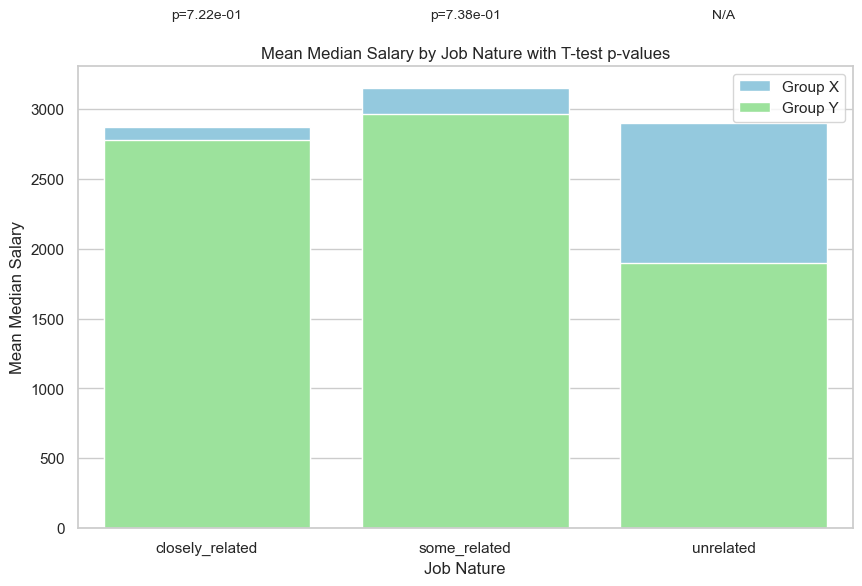

t_test_results_job_nature:

Job Nature: closely_related
  t-statistic: 0.3735
  p-value: 7.2229e-01

Job Nature: some_related
  t-statistic: 0.3504
  p-value: 7.3808e-01

Data Characteristic 5: salary differential between the groups is not statistically different by job nature. There is not enough data points to run a statistival test for salary difference by industry


In [74]:


########Data Characteristics 5########

# Perform t-tests to compare the mean median salaries between student groups by job nature
job_natures = df['job_nature'].unique()

job_nature_means = df.groupby(['job_nature', 'student_group'])['median_salary'].mean().unstack()

t_test_results_job_nature = {}
p_values_job_nature = []

for job_nature in job_natures:
    group_x_salaries = df[(df['job_nature'] == job_nature) & 
                          (df['student_group'] == 'x')]['median_salary']
    group_y_salaries = df[(df['job_nature'] == job_nature) & 
                          (df['student_group'] == 'y')]['median_salary']
    
    # Check if both groups have sufficient variance
    if len(group_x_salaries) > 1 and len(group_y_salaries) > 1 and group_x_salaries.var() > 0 and group_y_salaries.var() > 0:
        t_stat, p_value = ttest_ind(group_x_salaries, group_y_salaries, equal_var=False)
        t_test_results_job_nature[job_nature] = (t_stat, p_value)
        p_values_job_nature.append(p_value)
    else:
        p_values_job_nature.append(np.nan)

# Plotting mean median salary by job nature with p-value annotations
plt.figure(figsize=(10, 6))
sns.barplot(x=job_nature_means.index, y=job_nature_means['x'], color='skyblue', label='Group X')
sns.barplot(x=job_nature_means.index, y=job_nature_means['y'], color='lightgreen', label='Group Y')

for i, p_value in enumerate(p_values_job_nature):
    plt.text(i, job_nature_means.max().max() + 500, f'p={p_value:.2e}' if not np.isnan(p_value) else 'N/A', ha='center', fontsize=10)

plt.title('Mean Median Salary by Job Nature with T-test p-values')
plt.xlabel('Job Nature')
plt.ylabel('Mean Median Salary')
plt.legend()
plt.show()

print("t_test_results_job_nature:\n")
for job_nature, (t_stat, p_value) in t_test_results_job_nature.items():
    print(f"Job Nature: {job_nature}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4e}\n")

print ("Data Characteristic 5: salary differential between the groups is not statistically different by job nature. There is not enough data points to run a statistival test for salary difference by industry")